**Number of Polling Locations by Neighborhood**

*By Jackson Lustina*

I chose to do polling locations because of the 2020 Presidential Election. It would be very important for voters to know polling locations during an election. 

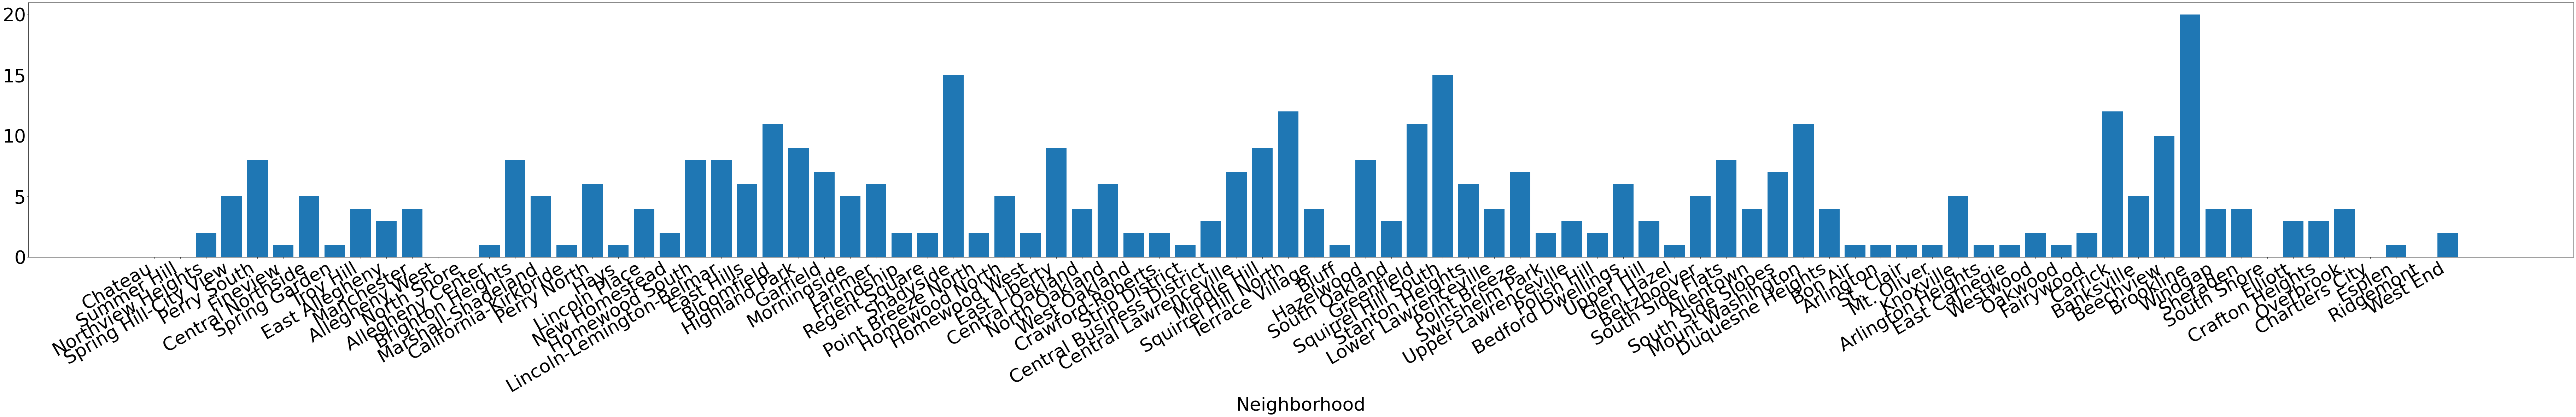

In [2]:
import pandas
# import pandas   

import geopandas
# pandas to work with geojson 

import matplotlib.pyplot as plt
# to map the graph map

neighborhood = geopandas.read_file("../Neighborhoods_.geojson")
# the Neighborhoods geojson file save as vriable neighborhood

poll = geopandas.read_file("Polling.geojson")
# the Polling geojson file save as veriable poll


pollNum = pandas.DataFrame(neighborhood.objectid , columns = ['objectid','polling'])
#create data frame to show number of polling locations

for index, n in neighborhood.iterrows():
    numOfPolls = 0
    for index, p in poll.iterrows():
        #check each neighbor and polling location inside nested loop for intersection 
        if n.geometry.intersects(p.geometry):
             numOfPolls +=1
    #if Polls condition becomes true then add new col in poll data frame
    pollNum.at[pollNum[pollNum['objectid'] == n.objectid].index.values[0],'polling'] = numOfPolls

# place polls col into the neighborhood geojson  to be used in map
neighborhood.insert(1 ,'polling', pollNum.polling)

# set size of of font and graph
plt.rcParams.update({'font.size': 52})
fil = plt.figure(figsize=(100, 10))
 
ax = fil.add_axes([0,0,1,1])

# add neighborhoods to x axis/show bar graph
ax.bar(neighborhood.hood,pollNum['polling'])
ax.set_xlabel('Neighborhood')
fil.autofmt_xdate()
plt.show()

<ipython-input-12-0121dc34747e>:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  neighborhood['center'] = neighborhood.geometry.centroid


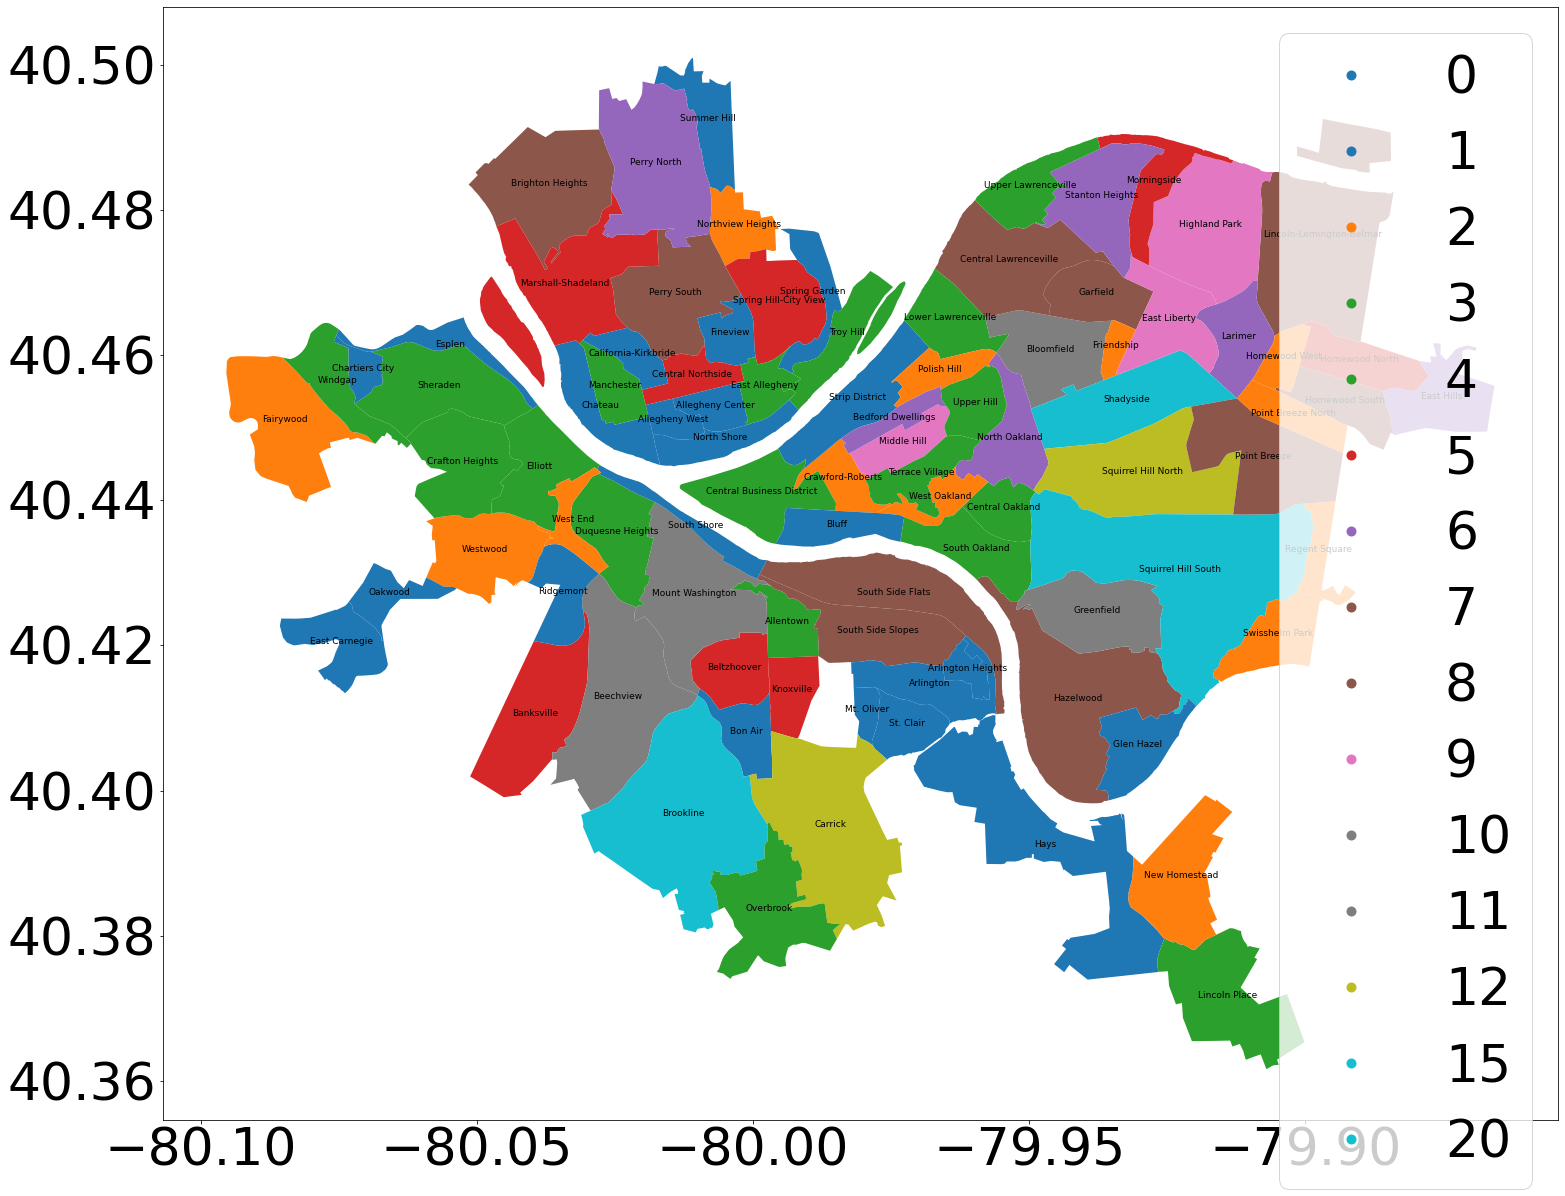

In [12]:
fig,ax = plt.subplots(figsize=(25,25))
#create the plot object

neighborhood['center'] = neighborhood.geometry.centroid
# find the center of neighborhood

# copy neighborhoods from file
neighborhoodPoints =  neighborhood.copy()

# new geomtry for center of shape 
neighborhoodPoints.set_geometry('center', inplace=True)

# each row set a name at a point
for x , y , label in zip(neighborhoodPoints.geometry.x, neighborhoodPoints.geometry.y, neighborhood.hood):
    plt.text(x, y, label, fontsize = 9, ha = 'center', weight='525')
    
#plot the map on ax with colors base off the number of polling locations
neighborhood.plot(column='polling', ax=ax, legend=True)

**Shadyside**, **Squirrel Hill South**, and **Brookline** are the areas with the most polling locations. These neighborhoods have somewhere between 15 and 20 polling locations. 